## Importing necessary packages

In [2]:
import sys
sys.path.append('C:\\Users\\navid\\Documents\\projects\\GitHub\\ML_from_scratch\\src')
from PrincipleComponentAnalysis import PrincipleComponentAnalysis

import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

# load iris dataset to test the package on. sklearn PCA loaded to compare results to
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

## Load and visualize data

In [4]:
iris = load_iris()

In [5]:
X = iris.data
y = iris.target

In [6]:
def my_pairplot(X, features = None, kind = 'scatter', kind_diag = 'hist', hue = None, bins = None):
    """
    Plotting variable-pair plots on a grid

    Parameters
    ----------
    X: np.ndarray
        Input data
        
    features: list-like object, dafault=None
        list of variable names
        
    kind: str, default='scatter'
        The type of plotting techique
        
    kind_diag: str, default='hist'
        The type of data presentation on the diagonal (data vs. itself)

    hue: np.ndarray, default= None
        The marker colors. See pyplot.scatter arguments.

    bins: int, np.ndarray, defualt = None
        if int, the number of equally sized bins
        if an array, the bin edges.
        See pyplot.hist arguments
    """
    n_samples, n_features = X.shape
    if features is None:
        features = [f'X{i}' for i in range(n_features)]
    fig, ax = plt.subplots(n_features, n_features, figsize=(12,12))
    for i in range(n_features):
        for j in range(n_features):
            if i == j:
                ax[i,j].hist(X[:, i], bins = bins)
            else:
                ax[j,i].scatter(X[:, i], X[:, j], c=hue)
            if j == 0:
                ax[i,j].set_ylabel(features[j])
            if i == n_features-1:
                ax[i,j].set_xlabel(features[i])

#### Plotting the data using the pairplot function above:

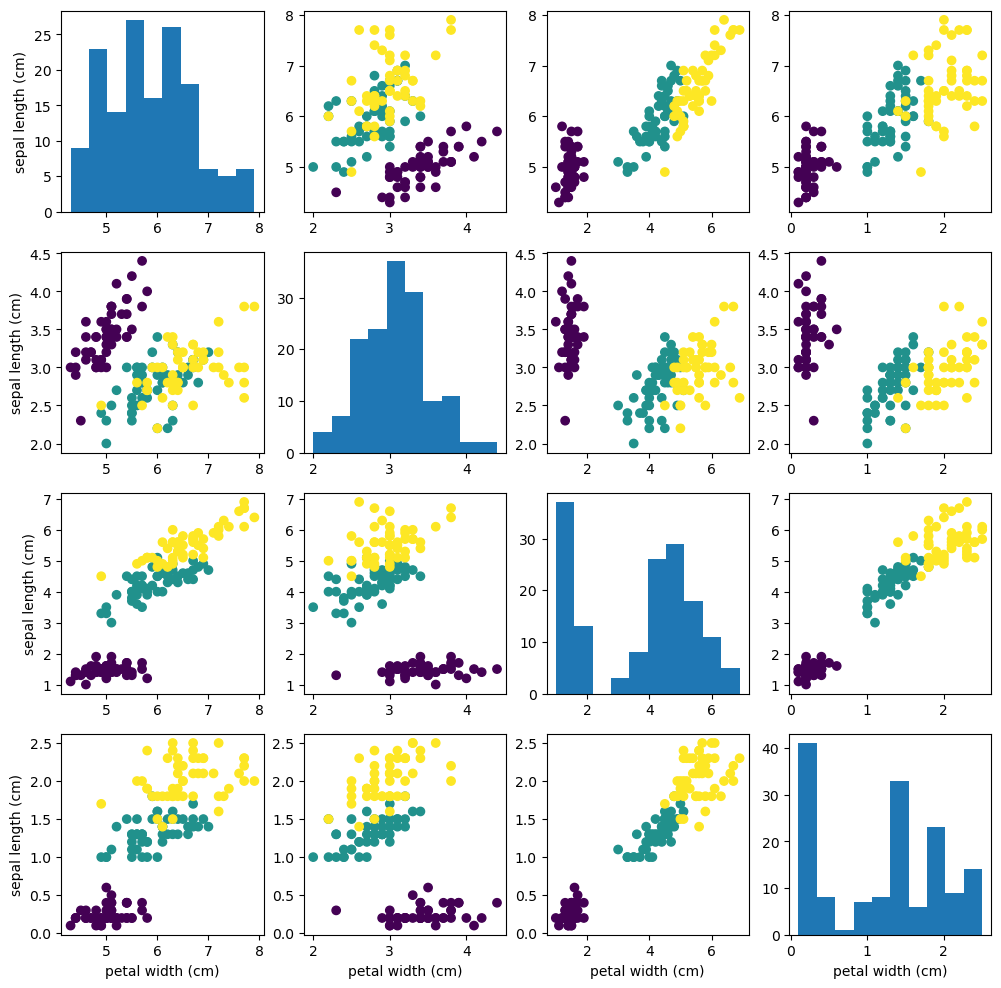

In [8]:
my_pairplot(X,features=iris.feature_names, hue=y)

## Applying PCA

#### Using ML_from_scratch package

In [11]:
myPCA = PrincipleComponentAnalysis(n_components=1)

In [12]:
# Fitting the data to find the principle axes
myPCA.fit(X)

In [13]:
myPCA.singular_values

array([25.09996044,  6.01314738,  3.41368064,  1.88452351])

In [14]:
# Transform the data onto main priciple component
Xpca = myPCA.transform(X)

In [15]:
myPCA.explained_variance

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

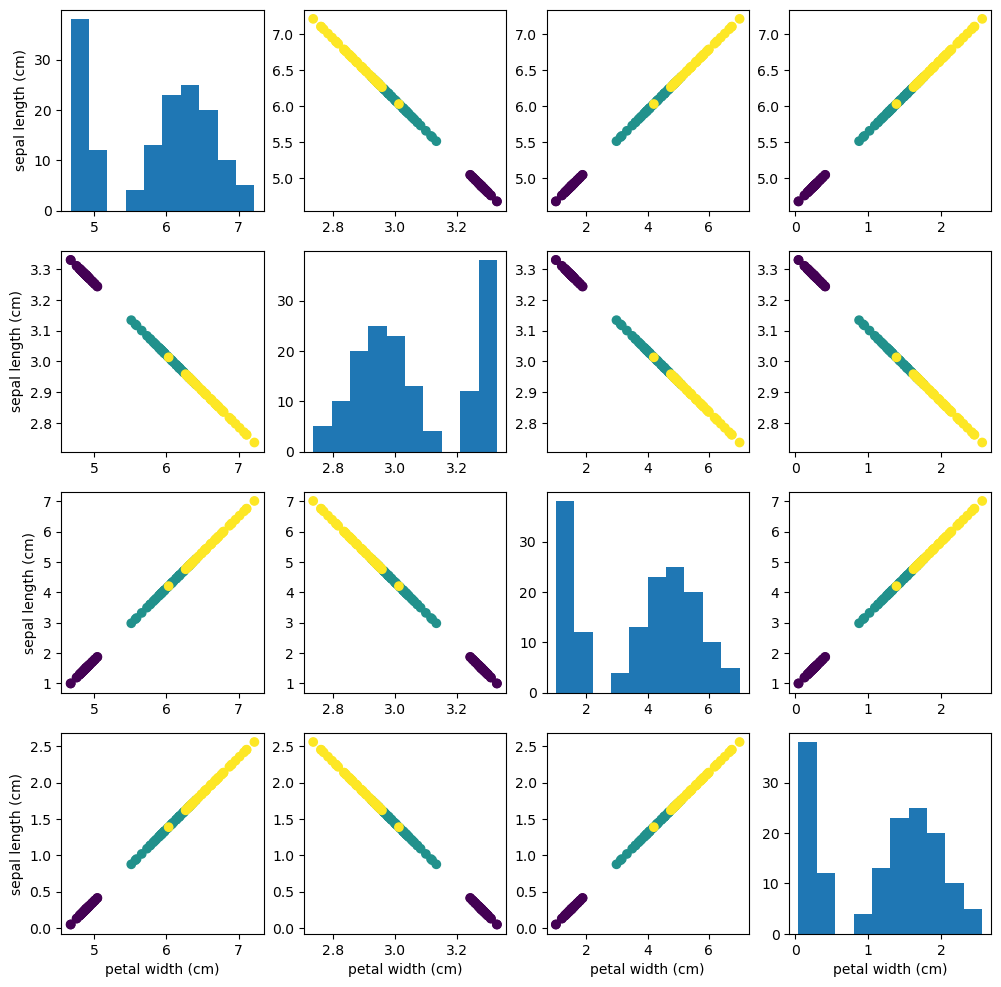

In [17]:
my_pairplot(Xpca,features=iris.feature_names, hue=y)

**We clearly see that using one component, we end of with the data all projected on to the largest eigenvector/principle axis.**

#### Using Sci-kit Learn

In [20]:
skPCA = PCA()

In [21]:
skPCA.fit(X)

PCA()

In [22]:
skPCA.singular_values_

array([25.09996044,  6.01314738,  3.41368064,  1.88452351])

In [23]:
skPCA.explained_variance_

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

### Results agree. Yay!